# 專題簡介與目標

有買房需求，考慮台北市、新北市、台中市和高雄市的房子，用內政部不動產交易實價登錄資料先了解行情  
使用資料: 
台北市 Taipei(A_lvr_land_A.csv)、新北市 New_Taipei(F_lvr_land_A.csv)、  
台中市 Taichung(B_lvr_land_A.csv)、高雄市 Kaohsiung(E_lvr_land_A.csv)

### 資料的萃取、清理和串接  
1. 不動產資料檔案讀取並串接  
2. 資料清理與切片  
3. 建立自定義特徵加入分析  

### 資料視覺化應用  
1. Group by之後將資料視覺化去看資料各縣市的分佈  
2. 用折線圖和長條圖呈現房價與建物型態間的變化  

### 使用的 Python 程式庫  
Pandas、Matplotlib  

1. 資料讀取可以利用 Pandas 讀 csv 檔案，並將資料做串接  
   去除遺失值  
   欄位的資料型態觀察與更改  
   類別資料編碼  
   資料切片，擷取需要分析的資料  
   尋找異常值  
2. 利用相關係數可以分析數據之間的關係為高相關或低相關，正相關或負相關  
3. 利用 Pandas 中的 .plot() 即可做到簡易的資料視覺化  

### 1. 不動產資料檔案讀取並串接

讀取csv檔  
台北市: A_lvr_land_A.csv  
新北市: B_lvr_land_A.csv  
台中市: E_lvr_land_A.csv  
高雄市: F_lvr_land_A.csv

In [5]:
import pandas as pd

In [6]:
data_a = pd.read_csv('./real estate/A_lvr_land_A.csv')
data_b = pd.read_csv('./real estate/B_lvr_land_A.csv')
data_e = pd.read_csv('./real estate/E_lvr_land_A.csv')
data_f = pd.read_csv('./real estate/F_lvr_land_A.csv')

### 1-2. 刪除英文翻譯列

In [7]:
#刪除row=0資料
data_a = data_a.drop([0])
data_b = data_b.drop([0])
data_e = data_e.drop([0])
data_f = data_f.drop([0])

### 1-3. 增加 city 欄位 和 給欄位值
台北市Taipei(A_lvr_land_A.csv)  
新北市New_Taipei(F_lvr_land_A.csv)  
台中市Taichung(B_lvr_land_A.csv)  
高雄市Kaohsiung(E_lvr_land_A.csv)  

In [8]:
#指定新增在第0欄
data_a.insert(0, 'City', 'Taipei')
data_b.insert(0, 'City', 'Taichung')
data_e.insert(0, 'City', 'Kaohsiung')
data_f.insert(0, 'City', 'New_Taipei')

### 1-4.合併四份資料

In [9]:
all_data = pd.concat([data_a,data_b,data_e,data_f], axis=0) #axis = 0直向合併
all_data

,City,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
1,Taipei,南港區,土地,中南段一小段545-23地號,401.0,都市：其他:保護區。,NaN,NaN,1110303,土地2建物0車位0,...,NaN,0.0,0,協議價購；,RPOSMLLLKHHGFDA37EA,0.00,0.00,0.00,無,NaN
2,Taipei,士林區,土地,富安段三小段289-1地號,251.0,都市：其他:遊樂區(細部計畫尚未完成，尚未能准許依變更後計畫用途使用)。,NaN,NaN,1110301,土地1建物0車位0,...,NaN,0.0,0,NaN,RPRNMLSJLHHGFEA87EA,0.00,0.00,0.00,無,1.0
3,Taipei,士林區,土地,富安段三小段87-1地號,193.33,都市：其他:堤防用地(公共設施用地)(將來係採用區段徵收之方式辦理整體開發)。80/6/5,NaN,NaN,1110302,土地4建物0車位0,...,NaN,0.0,0,NaN,RPRNMLTJLHHGFEA97EA,0.00,0.00,0.00,無,NaN
4,Taipei,萬華區,土地,莒光段四小段59地號,0.11,都市：其他:特定專用區(一)。,NaN,NaN,1110301,土地1建物0車位0,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易；,RPWOMLSJLHHGFBA08DA,0.00,0.00,0.00,無,NaN
5,Taipei,士林區,土地,永新段四小段452地號,1.62,都市：其他:第三種住宅區。,NaN,NaN,1110207,土地3建物0車位0,...,NaN,0.0,0,包含公共設施保留地用地；,RPOOMLLKKHHGFEA96EA,0.00,0.00,0.00,無,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15573,New_Taipei,中和區,房地(土地+建物)+車位,新北市中和區建康路１７８號二十八樓,33.4,住,NaN,NaN,1030410,土地1建物1車位1,...,坡道平面,37.71,1760000,預售屋、或土地及建物分件登記案件；,RPVNMLRJLHHGFHF98EA,144.57,10.79,15.81,有,NaN
15574,New_Taipei,中和區,房地(土地+建物)+車位,新北市中和區建康路１８６號二十八樓,36.4,住,NaN,NaN,1030411,土地1建物1車位1,...,坡道平面,37.71,1710000,預售屋、或土地及建物分件登記案件；,RPWNMLRJLHHGFHF09EA,162.98,11.35,13.09,有,NaN
15575,New_Taipei,板橋區,房地(土地+建物)+車位,新北市板橋區華江一路２０２號四樓,5.87,商,NaN,NaN,1001228,土地1建物1車位1,...,坡道平面,23.97,0,車位編號:172號,RPUOMLPJJHHGFAF77DA,44.38,0.00,5.01,有,4988.0
15576,New_Taipei,板橋區,房地(土地+建物)+車位,新北市板橋區華江一路３９７號三樓,17.69,住,NaN,NaN,1001117,土地1建物1車位1,...,坡道平面,32.7,0,NaN,RPURMLNJJHHGFAF87DA,65.44,8.52,6.34,有,4989.0


# 2. 資料清理與切片

自住，所以刪除住宿用途以外的資料，並且限制  

交易年月日，限制在107年含以上的資料  
建物現況格局-房，1-5間  
建物現況格局-廳，1-2廳  

### 2-1. columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用

a. columns_mapping: 將原中文欄位名稱，改為英文欄位名稱，以利後續分析  
b. analysis_columns: 需要分析的欄位  
c. columns_type: 欄位型態轉換  

In [10]:
columns_mapping = {'鄉鎮市區':'towns',
                   '交易標的':'transaction_sign',
                   '土地區段位置建物區段門牌':'house_number',
                   '土地位置建物門牌':'address',
                   '土地移轉總面積平方公尺':'land_area_square_meter', 
                   '都市土地使用分區':'use_zoning', 
                   '非都市土地使用分區':'land_use_district',
                   '非都市土地使用編定':'land_use',
                   '交易年月日':'tx_dt', 
                   '交易筆棟數':'transaction_pen_number', 
                   '移轉層次':'shifting_level', 
                   '總樓層數':'total_floor_number', 
                   '建物型態':'building_state', 
                   '主要用途':'main_use', 
                   '主要建材':'main_materials',
                   '建築完成年月':'complete_date', 
                   '建物移轉總面積平方公尺':'building_area_square_meter', 
                   '建物現況格局-房':'room_number', 
                   '建物現況格局-廳':'hall_number', 
                   '建物現況格局-衛':'health_number', 
                   '建物現況格局-隔間':'compartmented_number', 
                   '有無管理組織':'manages', 
                   '總價元':'total_price', 
                   '單價元平方公尺':'unit_price', 
                   '車位類別':'berth_category', 
                   '車位移轉總面積(平方公尺)':'berth_area_square_meter',
                   '車位總價元':'berth_price', 
                   '備註':'note', 
                   '編號':'serial_number', 
                   '主建物面積':'main_building_area', 
                   '附屬建物面積':'auxiliary_building_area', 
                   '陽台面積':'balcony_area', 
                   '電梯':'elevator'
                  }
analysis_columns = ['City','towns','main_use','building_state','use_zoning'
                    ,'total_price','building_area_square_meter','main_building_area','tx_dt','unit_price'
                    ,'room_number','hall_number','health_number'
                   ]
columns_type = {'total_price': 'int'
                ,'unit_price':'float'
                ,'building_area_square_meter':'float'
                ,'main_building_area': 'float'
                ,'room_number': 'int'
                ,'hall_number': 'int'
                ,'health_number': 'int'
               }

In [11]:
#將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)

In [12]:
#資料清理前，先查看資料
#analysis_data.head(5)
#analysis_data.to_excel('result.xlsx')

### 2-2. 取出主要用途(main_use)為'住家用' 以及都市土地使用分區(use_zoning)為'住'的資料，  
###        並針對以下欄位analysis_columns做分析並去除na值

In [13]:
analysis_data = analysis_data.loc[(analysis_data.main_use == '住家用')
                                  & (analysis_data.use_zoning == '住')
                                  & (analysis_data.note != '親友%'), analysis_columns].dropna()

### 2-3. column type 轉換

In [14]:
analysis_data.info()
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24260 entries, 7 to 15576
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        24260 non-null  object 
 1   towns                       24260 non-null  object 
 2   main_use                    24260 non-null  object 
 3   building_state              24260 non-null  object 
 4   use_zoning                  24260 non-null  object 
 5   total_price                 24260 non-null  object 
 6   building_area_square_meter  24260 non-null  object 
 7   main_building_area          24260 non-null  float64
 8   tx_dt                       24260 non-null  object 
 9   unit_price                  24260 non-null  object 
 10  room_number                 24260 non-null  object 
 11  hall_number                 24260 non-null  object 
 12  health_number               24260 non-null  object 
dtypes: float64(1), object(12)
memor

### 2-4. 資料切片  
         a. 指定只看107年資料(tx_dt): 新增欄位(tx_dt_year)
         b. 建物現況格局-房(room_number)，限制在1到5間
         c. 建物現況格局-廳(hall_number)，限制在1到2廳
         d. 最後運用.reset_index()重新定義索引

In [15]:
#a. 指定只看107年以後資料(tx_dt): 新增欄位(tx_dt_year)
analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x[:-4]))

In [16]:
#b. 建物現況格局-房(room_number)，限制在1到5間
#c. 建物現況格局-廳(hall_number)，限制在1到2廳
#d. 重新定義索引
analysis_data = analysis_data.loc[(analysis_data.tx_dt_year >= 107)
                                  & (analysis_data.room_number >= 1)
                                  & (analysis_data.room_number <= 5)
                                  & (analysis_data.hall_number >= 1)
                                  & (analysis_data.hall_number <= 2)
                                 ]
analysis_data = analysis_data.reset_index(drop=True)

In [17]:
#觀察資料
#analysis_data.head(5)
#analysis_data.to_excel('result.xlsx')

# 3. 建立自定義特徵加入分析

### 3-1. 定義新特徵 : 1平方公尺相當於0.3025坪  
  
建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺 x 0.3025  
主建物面積坪(main_building_area_square_feet) : 主建物面積 x 0.3025  
單價元坪(unit_price_square_feet) : 單價元平方公尺 / 0.3025  

In [18]:
#新增三個欄位存放單位轉換後的值
analysis_data['building_area_square_feet'] = analysis_data.building_area_square_meter*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data.main_building_area*0.3025
analysis_data['unit_price_square_feet'] = analysis_data.unit_price/0.3025

### 3-2. 觀察資料

In [19]:
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.157500e+04,21575.000000,21575.000000,2.157500e+04,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,2.157500e+04
mean,1.377548e+07,138.647358,82.649048,1.044678e+05,2.843754,1.829340,1.835226,109.785632,41.940826,25.001337,3.453480e+05
std,1.116437e+07,63.108827,42.565422,6.342730e+04,0.879931,0.376221,0.885469,0.926059,19.090420,12.876040,2.096770e+05
min,1.000000e+04,1.320000,0.000000,1.510000e+02,1.000000,1.000000,0.000000,107.000000,0.399300,0.000000,4.991736e+02
25%,7.800000e+06,96.730000,56.560000,6.741000e+04,2.000000,2.000000,1.000000,110.000000,29.260825,17.109400,2.228430e+05
50%,1.120000e+07,128.650000,74.990000,8.868200e+04,3.000000,2.000000,2.000000,110.000000,38.916625,22.684475,2.931636e+05
75%,1.616000e+07,166.340000,93.955000,1.287315e+05,3.000000,2.000000,2.000000,110.000000,50.317850,28.421388,4.255587e+05
max,2.667800e+08,695.040000,639.610000,4.290970e+06,5.000000,2.000000,52.000000,111.000000,210.249600,193.482025,1.418502e+07


發現 
main_building_area min是零  
main_building_area_square_feet min是零  
需將其拿掉

In [20]:
analysis_data = analysis_data.loc[(analysis_data.main_building_area > 0)
                                  &(analysis_data.main_building_area_square_feet > 0)]

In [21]:
#拿掉後再觀察資料
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.155700e+04,21557.000000,21557.000000,2.155700e+04,21557.000000,21557.000000,21557.000000,21557.000000,21557.000000,21557.000000,2.155700e+04
mean,1.377754e+07,138.620297,82.718060,1.044982e+05,2.842418,1.829197,1.833372,109.785360,41.932640,25.022213,3.454486e+05
std,1.116742e+07,63.083647,42.516106,6.343168e+04,0.878753,0.376345,0.882645,0.926353,19.082803,12.861122,2.096915e+05
min,1.000000e+04,2.990000,2.990000,1.510000e+02,1.000000,1.000000,0.000000,107.000000,0.904475,0.904475,4.991736e+02
25%,7.800000e+06,96.720000,56.650000,6.746600e+04,2.000000,2.000000,1.000000,110.000000,29.257800,17.136625,2.230281e+05
50%,1.120000e+07,128.640000,75.000000,8.872700e+04,3.000000,2.000000,2.000000,110.000000,38.913600,22.687500,2.933124e+05
75%,1.617000e+07,166.320000,93.990000,1.287590e+05,3.000000,2.000000,2.000000,110.000000,50.311800,28.431975,4.256496e+05
max,2.667800e+08,695.040000,639.610000,4.290970e+06,5.000000,2.000000,52.000000,111.000000,210.249600,193.482025,1.418502e+07


In [22]:
#觀察資料
#analysis_data.head(5)
#analysis_data.to_excel('result.xlsx')

# 4. 資料視覺化_房價走勢

### 4-1. 台北市、新北市、台中市和高雄市從107年到111年的房價平均數走勢  
     結論: 110年和111年平均房價持平，高雄市在四個縣市中房價最低

<AxesSubplot:title={'center':'Living Place Price History'}, xlabel='Year', ylabel='Unit price square feet(TWD)'>

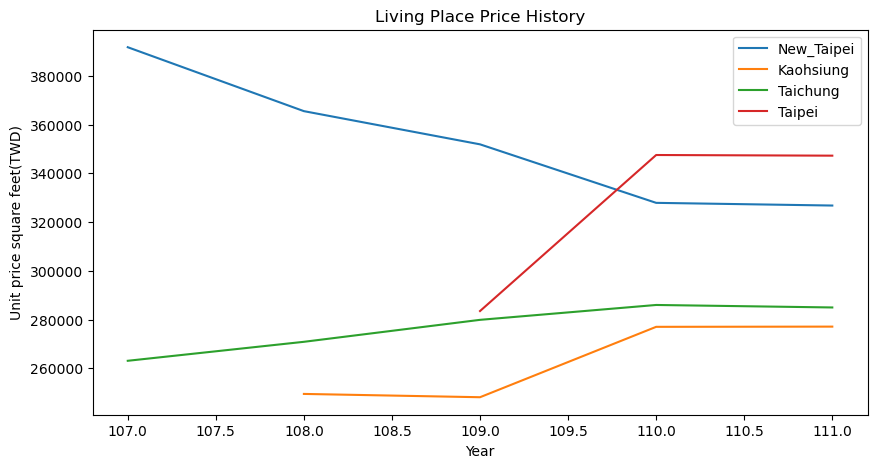

In [23]:
#篩選各縣市(City)的一坪單價，取四分位數25%-75%間的坪單價
prices = {}
for district in set(analysis_data['City']):
    cond = (
        (analysis_data['City'] == district)
        & (analysis_data['unit_price_square_feet'] <= analysis_data["unit_price_square_feet"].quantile(0.75))
        & (analysis_data['unit_price_square_feet'] >= analysis_data["unit_price_square_feet"].quantile(0.25))
        )
    
    groups = analysis_data[cond]['tx_dt_year']
    
    prices[district] = analysis_data[cond]['unit_price_square_feet'].astype(float).groupby(groups).mean()
    
price_history = pd.DataFrame(prices)
price_history.plot(title='Living Place Price History',
                    xlabel='Year',
                    ylabel='Unit price square feet(TWD)',
                    legend=True,                    
                    figsize=(10, 5))

### 4-2. 高雄市從107年到目前的建物型態房價走勢  
     結論:公寓(5樓以下無電梯)的房價大幅下修，華廈(10樓以下有電梯)房價往上升且高於公寓和透天厝價格

In [24]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

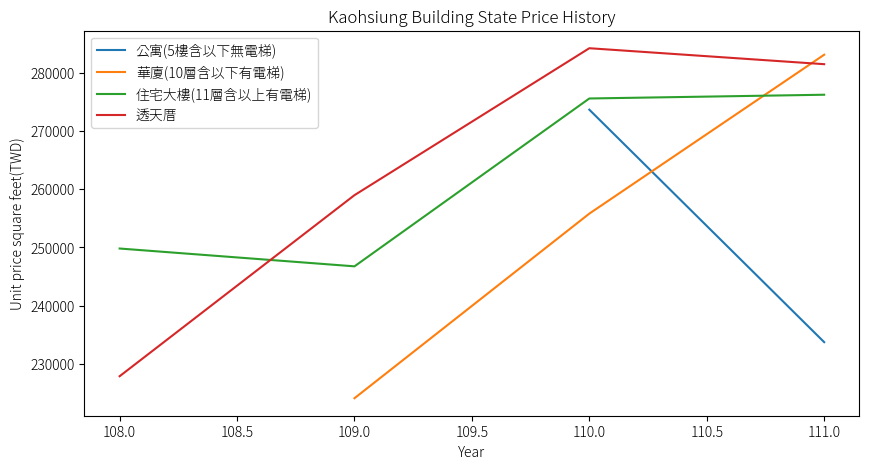

In [25]:
#取高雄市各建案型態的一坪單價，取四分位數25%-75%間的坪單價
building_type_prices = {}
for building_type in set(analysis_data['building_state']):
    cond = (
            (analysis_data["City"]=='Kaohsiung')
           &(analysis_data['unit_price_square_feet'] < analysis_data["unit_price_square_feet"].quantile(0.75))
           & (analysis_data['unit_price_square_feet'] > analysis_data["unit_price_square_feet"].quantile(0.25))
           & (analysis_data['building_state'] == building_type)
     )
    groups = analysis_data[cond]['tx_dt_year']
    
    building_type_prices[building_type] = analysis_data[cond]['unit_price_square_feet'].astype(float).groupby(groups).mean()

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] #中文亂碼
    
building_type_prices = pd.DataFrame(building_type_prices)

building_type_prices.plot(title='Kaohsiung Building State Price History',
                    xlabel='Year',
                    ylabel='Unit price square feet(TWD)',
                    legend=True,                    
                    figsize=(10, 5))

#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x))) #x軸整數

# 顯示圖表
plt.show()

### 4-3. 將高雄-前金區的房價單獨拿出來看，並且按照建案型態製作分佈圖
 結論: 110年前金區的住宅大樓每坪落在2萬4到2萬6之間

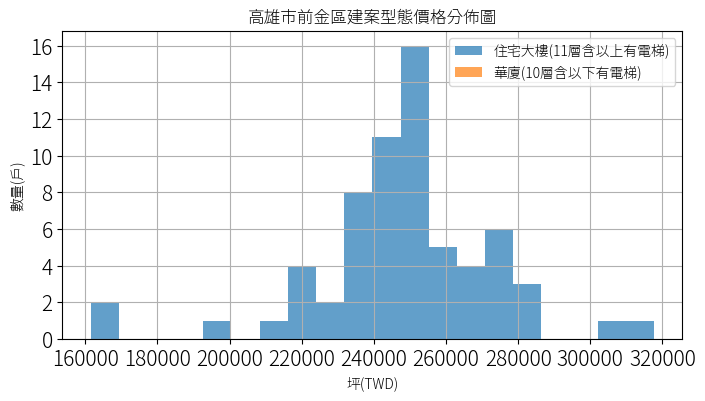

In [28]:
#110年高雄市前金區每坪方35萬內的住宅大樓和華廈價格分佈圖
dfdistrict = analysis_data[(analysis_data['City'] == 'Kaohsiung') 
                            & (analysis_data['towns'] == '前金區') 
                            & (analysis_data['tx_dt_year'] == 110)     
                            & ((analysis_data['building_state'] == '住宅大樓(11層含以上有電梯)') 
                                | (analysis_data['building_state'] == '華廈(10層含以下有電梯)') 
                              # | (analysis_data['building_state'] == '公寓(5樓含以下無電梯)')
                         )]

dfdistrict_filter = dfdistrict[dfdistrict['unit_price_square_feet'] < 350000]
dfdistrict = dfdistrict_filter['unit_price_square_feet'].groupby(dfdistrict['building_state'])
dfdistrict.plot ( kind='hist'
                , alpha=0.7
                , bins=20
                , title='高雄市前金區建案型態價格分佈圖'
                , grid=True
                , figsize=(8,4)
                , fontsize=15
                , legend=True)
plt.xlabel('坪(TWD)')
plt.ylabel("數量(戶)")
plt.show()